In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential

In [77]:
trainn = ImageDataGenerator(rescale=1./255)
# test =  ImageDataGenerator(rescale=1./255)
validation =  ImageDataGenerator(rescale=1./255)

In [3]:
train='dataset/train/'

In [71]:
training = trainn.flow_from_directory(train, 
                                      target_size = (128, 128),
                                      batch_size = 32,
                                      class_mode = "categorical")

Found 5112 images belonging to 2 classes.


In [72]:
training.classes

array([0, 0, 0, ..., 1, 1, 1])

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5112 files belonging to 2 classes.
Using 4090 files for training.


In [5]:
val='dataset/train/'

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5112 files belonging to 2 classes.
Using 1022 files for validation.


In [7]:
test='dataset/test/'

In [89]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(128,128),
    batch_size=32,
    seed=1000
    )

Found 1470 files belonging to 2 classes.


In [37]:
data_test = np.load('Parkinson_disease_detection/test_set.npz', allow_pickle=True)
x_test = data_test['arr_0']
y_test = data_test['arr_1']

print(x_test.shape)
print(y_test.shape)

(30, 256, 256, 3)
(30,)


In [9]:
class_names = ['healthy', 'parkinson']

In [10]:
train_data.class_names = class_names
val_data.class_names = class_names

In [11]:
print(val_data)

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


In [104]:
print(test_data)

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [13]:
input_shape=(128, 128, 3)
regularizer = tf.keras.regularizers.l2(0.001)

model=Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model.add(MaxPool2D((9, 9), strides=(3, 3)))

model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model.add(MaxPool2D((5, 5), strides=(2, 2)))

model.add(Conv2D(32 , (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu'))
model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', name='fc1'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax', name='fc3'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 128, 128, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 40, 40, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 4, 32)          9

In [15]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
# model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [94]:
metrics = [TruePositives(name='tp'),FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'),
          BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

In [97]:
optimizer = tf.keras.optimizers.Adam(3.15e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
128/128 [==============================] - 22s 100ms/step - loss: 1.0222 - accuracy: 0.5465 - val_loss: 0.6641 - val_accuracy: 0.5851
Epoch 2/50
128/128 [==============================] - 9s 72ms/step - loss: 0.7431 - accuracy: 0.5910 - val_loss: 0.6598 - val_accuracy: 0.5705
Epoch 3/50
128/128 [==============================] - 10s 75ms/step - loss: 0.6910 - accuracy: 0.6232 - val_loss: 0.6010 - val_accuracy: 0.6781
Epoch 4/50
128/128 [==============================] - 10s 80ms/step - loss: 0.6215 - accuracy: 0.6587 - val_loss: 0.5419 - val_accuracy: 0.7466
Epoch 5/50
128/128 [==============================] - 11s 82ms/step - loss: 0.5956 - accuracy: 0.6844 - val_loss: 0.5530 - val_accuracy: 0.7162
Epoch 6/50
128/128 [==============================] - 10s 80ms/step - loss: 0.5433 - accuracy: 0.7249 - val_loss: 0.4860 - val_accuracy: 0.7495
Epoch 7/50
128/128 [==============================] - 10s 80ms/step - loss: 0.5090 - accuracy: 0.7484 - val_loss: 0.4214 - val_accuracy:

In [19]:
model.save("weight_test1.h5")

In [20]:
model.evaluate(val_data)

32/32 [==============================] - 1s 23ms/step - loss: 0.0708 - accuracy: 0.9726


[0.07083631306886673, 0.9726027250289917]

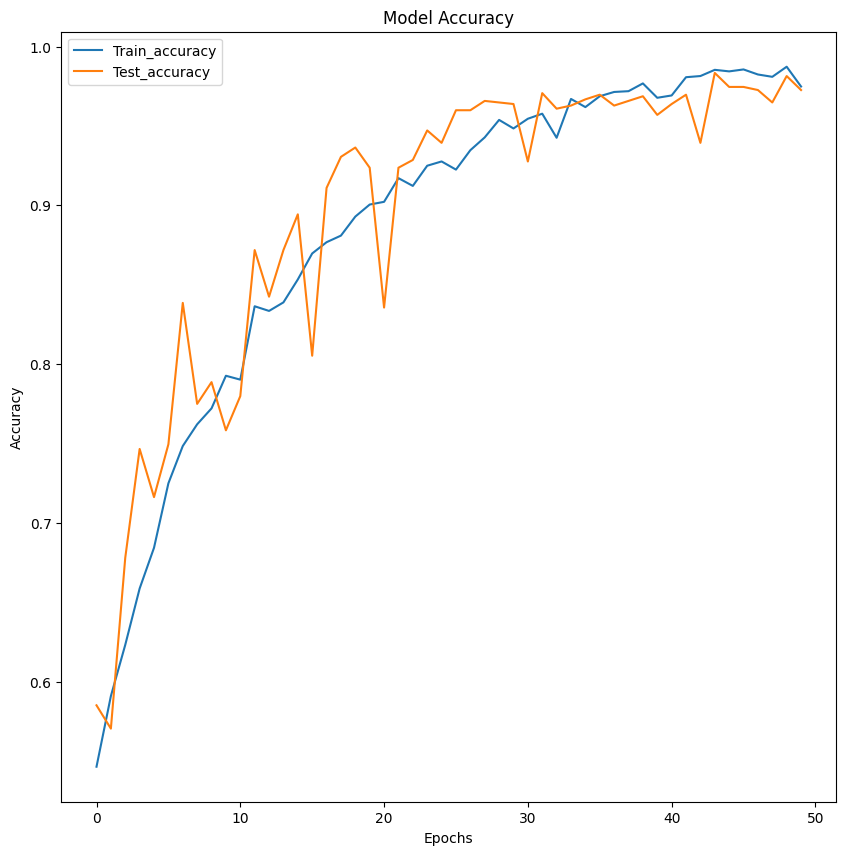

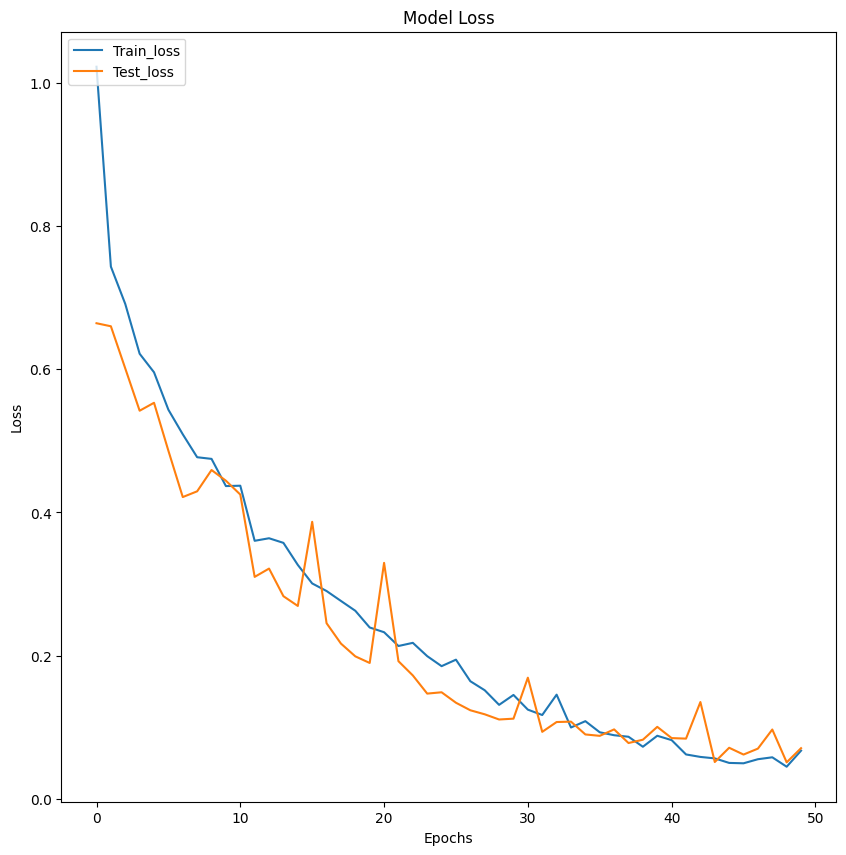

In [21]:
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

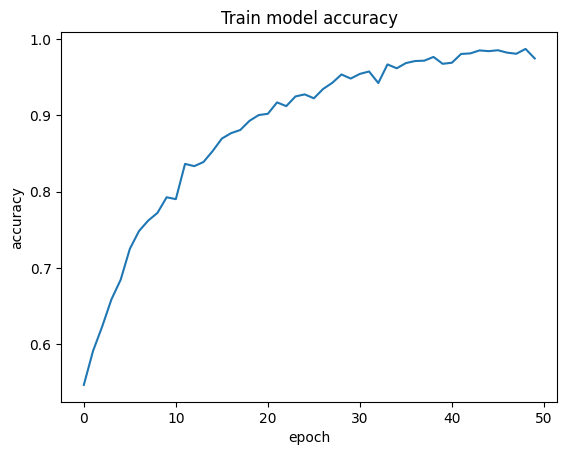

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

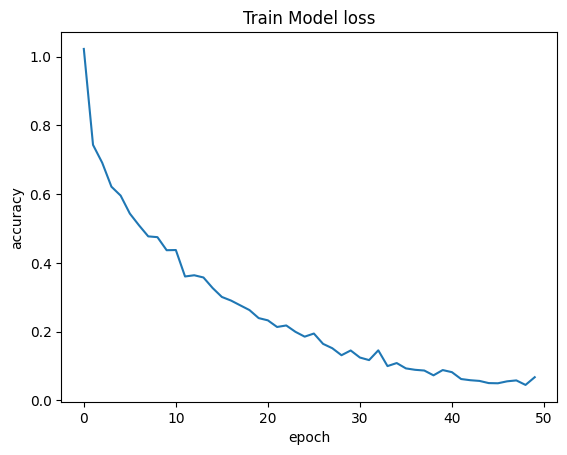

In [23]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

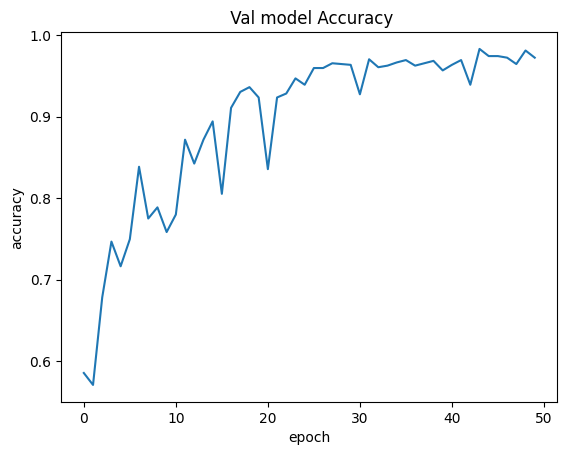

In [24]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

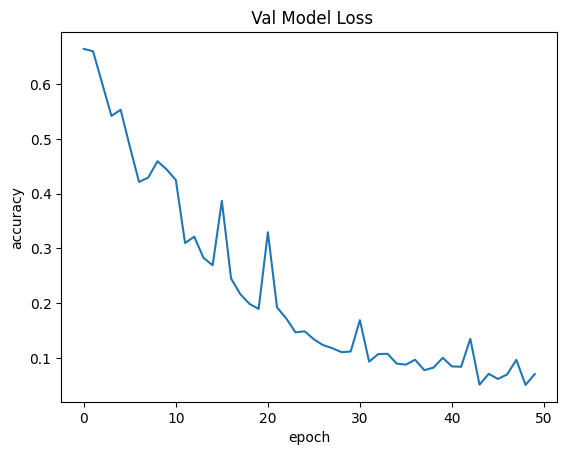

In [25]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

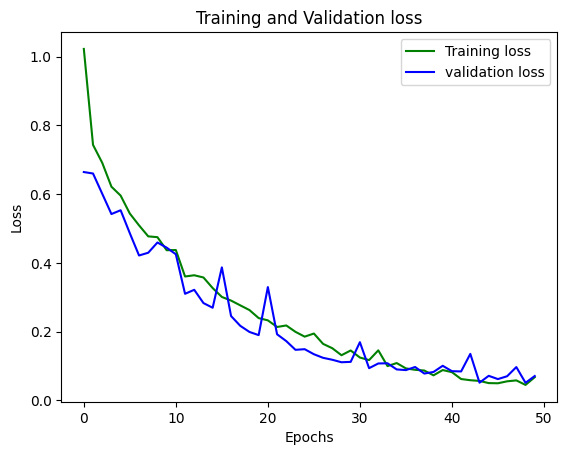

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

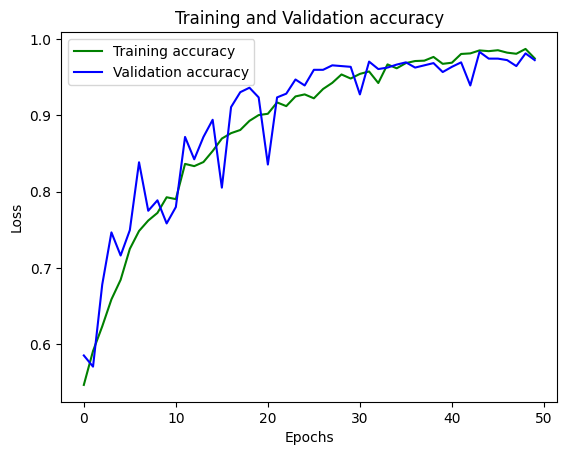

In [27]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Model Evaluation

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
Y_pred = model.predict(training)

In [75]:
y_pred = np.argmax(Y_pred, axis=1)

In [116]:
print(classification_report(training.classes, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.05      0.09      2556
           1       0.50      0.95      0.66      2556

    accuracy                           0.50      5112
   macro avg       0.50      0.50      0.37      5112
weighted avg       0.50      0.50      0.37      5112



In [114]:
preds = model.predict(test_data)

In [ ]:
Parkinson=[]
Normal=[]
for i in range(len(preds)):
    if

In [90]:
test_data

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [92]:
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC 
import seaborn as sns

In [98]:
model.evaluate(test_data)

46/46 [==============================] - 2s 29ms/step - loss: 0.0881 - accuracy: 0.9687


[0.0880846157670021, 0.9687075018882751]

In [ ]:
cm = confusion_matrix()

In [ ]:
#Confusion Matrix

In [105]:
labels = []
inp = []

for x,y in test_data.as_numpy_iterator():
    labels.append(y)
    inp.append(x)

In [113]:
print(np.array(inp).shape)

(46,)


C:\Users\legion\AppData\Local\Temp\ipykernel_13036\2738985033.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(inp).shape)


In [101]:
labels = np.array([i[0] for i in labels])
print(labels)

[0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 0 0 0]


In [ ]:
model.predict()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
results = model.predict(val_data)
results

array([[0.02390398, 0.976096  ],
       [0.99803454, 0.00196544],
       [0.49854016, 0.50145984],
       ...,
       [0.01827372, 0.98172635],
       [0.9948084 , 0.00519164],
       [0.99539375, 0.00460632]], dtype=float32)

In [57]:
import numpy as np

predictions = [np.argmax(cls) for cls in results]
original = []
for image, label in val_data:
    original.extend([int(val) for val in label])

from sklearn import metrics

metrics.confusion_matrix(predictions, original)

array([[267, 269],
       [245, 241]], dtype=int64)

In [58]:
import seaborn as sns

<AxesSubplot: >

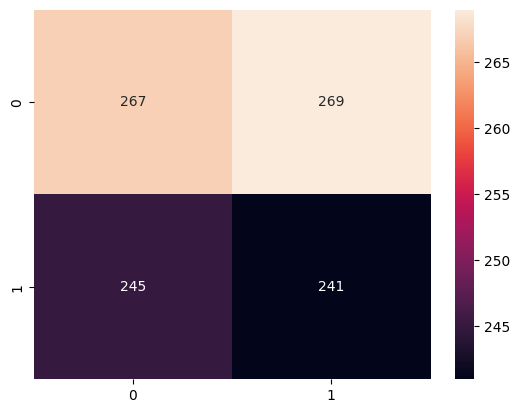

In [59]:
sns.heatmap(confusion_matrix(predictions, original), annot=True, fmt='d')

In [52]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(predictions, original), 2)}") 
print(f"Precision: {round(precision_score(predictions, original), 2)}")
print(f"Recall: {round(recall_score(predictions, original), 2)}")
print(f"F1_score: {round(f1_score(predictions, original), 2)}")

Accuracy: 0.5
Precision: 0.48
Recall: 0.5
F1_score: 0.49


In [54]:
print(classification_report(predictions, original))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       536
           1       0.48      0.50      0.49       486

    accuracy                           0.50      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.50      0.50      0.50      1022

